In [1]:
import sys
sys.path.append('../')

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pandas import read_csv



from matplotlib.font_manager import fontManager, FontProperties

path = "../times_new_roman.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)

plt.style.use('seaborn-paper')
sns.set(font=prop.get_name(), style='whitegrid')

In [3]:

import pickle
import glob

def plot_multiple(score_list, labels, dot_types, key, title=None, as_svg=True, rbranch=None, st_idx=0):
    merged = {'itr': [], key: [], 'model_size': [], 'dataset': [], 'model_dot': []}
    for idx, score_dict in enumerate(score_list):
        iterations = [itr for itr in score_dict if itr >= st_idx]
        iterations.sort()
        for itr in iterations:
            score_list_curr = [np.mean(score_dict[itr])]
            merged['itr'] += [itr/1000]*len(score_list_curr)
            merged[key] += score_list_curr
            merged['model_size'] += [labels[idx]]*len(score_list_curr)
            merged['model_dot'] += [dot_types[idx]]*len(score_list_curr)
            merged['dataset'] += [labels[idx]]*len(score_list_curr)
        
    df = pd.DataFrame(merged)
    if labels == ['2 layers', '4 layers', '6 layers']:
        colors = ['darkblue', 'darkgreen', 'darkred'] 
    else:
        colors = ['darkblue', 'darkred', 'darkorange'] 

    obj = sns.lineplot(data=df, x="itr", y=key, hue='model_size', palette=colors)
    
    obj.lines[0].set_linestyle(dot_types[0])
    obj.lines[1].set_linestyle(dot_types[1])
    obj.lines[2].set_linestyle(dot_types[2])

    
    obj.set_xlabel('thousand steps', fontsize=35)
    obj.set_ylabel(key, fontsize=35)
    #obj.set_ylim([0.2, 1.5])
    for label in (obj.get_xticklabels() + obj.get_yticklabels()):
        label.set_fontsize(25)    

    if rbranch is not None:
        obj.axhline(rbranch, ls='--', c='r')
    sns.despine()
    plt.setp(obj.get_legend().get_texts(), fontsize=25)
    obj.get_legend().set_title(None)
    
    plt.show()
    if title:
        obj.get_figure().savefig('figs/{}.ps'.format(title), bbox_inches="tight")
    

import glob

def get_scores(folder_names):
    all_tree_scores = []
    all_parsing_accs = []
    for folder_name in folder_names:
        model_name = folder_name
        curr_tree_scores = {}
        curr_parsing_accs = {}
        curr_hierarchical_distances = {}
        curr_norm = {}
        for fname in glob.glob('../SCI_SCORES/{}/*.txt'.format(folder_name)):
            all_data = [line.strip() for line in open(fname)]
            cnum = int(fname.split('/')[-1].split('_')[-1].split('.')[0])
            curr_tree_scores[cnum] = float(all_data[0])
            curr_parsing_accs[cnum] = float(all_data[1])
        all_tree_scores.append(curr_tree_scores)
        all_parsing_accs.append(curr_parsing_accs)
    return all_tree_scores, all_parsing_accs

In [5]:
import numpy as np

def get_mean_score(all_scores, normalize=False, ignore_first=False, is_dyck=False):
    mean_scores = {}
    
    if is_dyck:
        all_itrs = range(10000, 510000, 10000)
    else:
        all_itrs = range(3000, 303000, 3000)
    
    for itr in all_itrs:
        if itr > 400000:
            continue
        if ignore_first and itr==3000:
            continue
        curr = []
        for score in all_scores:
            if itr in score:
                curr.append(score[itr])
        if len(curr) > 0:
            mean_scores[itr] = curr
        else:
            continue
    if normalize:
        max_val = max([mean_scores[key] for key in mean_scores])
        return {key: s / max_val for key, s in mean_scores.items()}
    else:
        return mean_scores

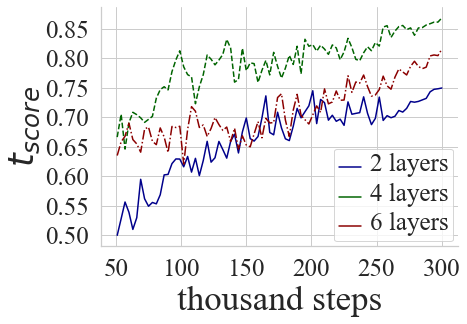

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


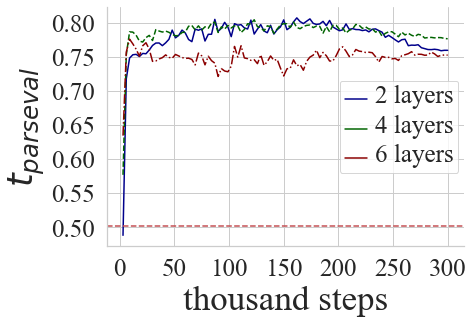

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.7495756550651204 0.0672888291505331
0.8685568040966682 0.14642311468323463
0.8155612905717469 0.0598844146264779


In [6]:
folder_names_6 = ['lm_6layers_tense_102_sci',
'lm_6layers_tense_112_sci',
'lm_6layers_tense_122_sci',
'lm_6layers_tense_132_sci',
'lm_6layers_tense_42_sci',
'lm_6layers_tense_52_sci',
'lm_6layers_tense_62_sci',
'lm_6layers_tense_72_sci',
'lm_6layers_tense_82_sci',
'lm_6layers_tense_92_sci']


folder_names_4 = ['lm_4layers_tense_102_sci',
'lm_4layers_tense_112_sci',
'lm_4layers_tense_122_sci',
'lm_4layers_tense_132_sci',
'lm_4layers_tense_42_sci',
'lm_4layers_tense_52_sci',
'lm_4layers_tense_62_sci',
'lm_4layers_tense_72_sci',
'lm_4layers_tense_82_sci',
'lm_4layers_tense_92_sci']

folder_names_2 = ['lm_2layers_tense_102_sci',
'lm_2layers_tense_112_sci',
'lm_2layers_tense_122_sci',
'lm_2layers_tense_132_sci',
'lm_2layers_tense_42_sci',
'lm_2layers_tense_52_sci',
'lm_2layers_tense_62_sci',
'lm_2layers_tense_72_sci',
'lm_2layers_tense_82_sci',
'lm_2layers_tense_92_sci']


all_tree_scores_2, all_parsing_accs_2 = get_scores(folder_names_2)
all_tree_scores_4, all_parsing_accs_4 = get_scores(folder_names_4)
all_tree_scores_6, all_parsing_accs_6 = get_scores(folder_names_6)

plot_multiple([get_mean_score(all_tree_scores_2), get_mean_score(all_tree_scores_4),
              get_mean_score(all_tree_scores_6)], ['2 layers', '4 layers', '6 layers'], 
              ['-', '--', '-.'], '$t_{score}$', 't_score_tense', st_idx=50000)


plot_multiple([get_mean_score(all_parsing_accs_2), 
               get_mean_score(all_parsing_accs_4),
              get_mean_score(all_parsing_accs_6)], ['2 layers', '4 layers', '6 layers'], ['-', '--', '-.'], 
              '$t_{parseval}$', 't_parseval_tense', rbranch=0.5015176190894175)


print(np.mean([f[300000] for f in all_tree_scores_2]),
     np.std([f[300000] for f in all_tree_scores_2]))
print(np.mean([f[300000] for f in all_tree_scores_4]),
      np.std([f[300000] for f in all_tree_scores_4]))

print(np.mean([f[300000] for f in all_tree_scores_6]),
     np.std([f[300000] for f in all_tree_scores_6]))

In [12]:
from chart_parsing import right_branching_parse, left_branching_parse, get_parsing_accuracy
from transformer_lm_sci import get_gold_parse, process
from data_utils.tense_inflection_helpers import read_ti_data

in_sentences, _ = read_ti_data(['train'])
in_sentences, targets = process(
            in_sentences, split_by_words=["PRESENT", "PAST"]
        )



gold_parses = {sent: get_gold_parse('tense', "{} . present".format(sent)) for sent in in_sentences}


all_sents = [sent for sent in gold_parses]
rb_parses = {sent: right_branching_parse(sent) for sent in all_sents}
lb_parses = {sent: left_branching_parse(sent) for sent in all_sents}


print(get_parsing_accuracy([rb_parses[sent] for sent in all_sents], [gold_parses[sent] for sent in all_sents])['f1'])
print(get_parsing_accuracy([lb_parses[sent] for sent in all_sents], [gold_parses[sent] for sent in all_sents])['f1'])

0.5015176190894175
0.3556373933410777


In [13]:
print(np.mean([f[300000] for f in all_parsing_accs_2]))
print(np.mean([f[300000] for f in all_parsing_accs_4]))
print(np.mean([f[300000] for f in all_parsing_accs_6]))

0.7598717460736468
0.7767715923685271
0.7528157120479766


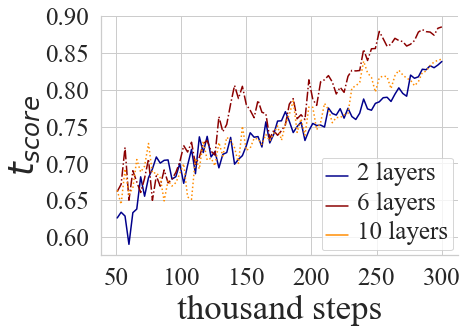

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


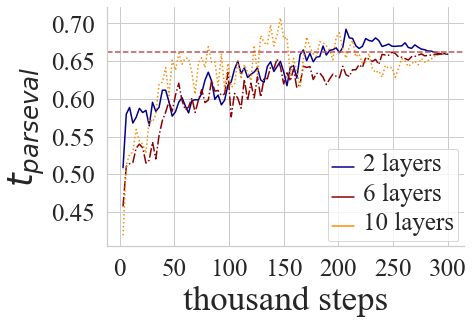

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
folder_names_10 = ['lm_10layers_lm_102_sci',
'lm_10layers_lm_112_sci',
'lm_10layers_lm_122_sci',
'lm_10layers_lm_132_sci',
'lm_10layers_lm_42_sci',
'lm_10layers_lm_52_sci',
'lm_10layers_lm_62_sci',
'lm_10layers_lm_72_sci',
'lm_10layers_lm_82_sci',
'lm_10layers_lm_92_sci']


folder_names_2 = ['lm_2layers_lm_102_sci',
'lm_2layers_lm_112_sci',
'lm_2layers_lm_122_sci',
'lm_2layers_lm_132_sci',
'lm_2layers_lm_42_sci',
'lm_2layers_lm_52_sci',
'lm_2layers_lm_62_sci',
'lm_2layers_lm_72_sci',
'lm_2layers_lm_82_sci',
'lm_2layers_lm_92_sci']

folder_names_6 = [
'lm_6layers_f_more_itrs_102_sci',
'lm_6layers_f_more_itrs_112_sci',
'lm_6layers_f_more_itrs_122_sci',
'lm_6layers_f_more_itrs_132_sci',
'lm_6layers_f_more_itrs_42_sci',
'lm_6layers_f_more_itrs_52_sci',
'lm_6layers_f_more_itrs_62_sci',
'lm_6layers_f_more_itrs_72_sci',
'lm_6layers_f_more_itrs_82_sci',
'lm_6layers_f_more_itrs_92_sci'
]



all_tree_scores_2, all_parsing_accs_2 = get_scores(folder_names_2)
all_tree_scores_6, all_parsing_accs_6 = get_scores(folder_names_6)
all_tree_scores_10, all_parsing_accs_10 = get_scores(folder_names_10)

plot_multiple([get_mean_score(all_tree_scores_2), get_mean_score(all_tree_scores_6),
              get_mean_score(all_tree_scores_10)], ['2 layers', '6 layers', '10 layers'], 
              ['-', '-.', ':'], '$t_{score}$', 't_score_qf', st_idx=50000)


plot_multiple([get_mean_score(all_parsing_accs_2), get_mean_score(all_parsing_accs_6),
              get_mean_score(all_parsing_accs_10)], ['2 layers', '6 layers', '10 layers'], 
              ['-', '-.', ':'], '$t_{parseval}$', 't_parseval_qf', rbranch=0.6627659508342925)